# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from scipy.stats import ttest_ind, ttest_1samp, levene, shapiro, f_oneway

In [13]:
df = pd.read_csv("petrol.csv")
#checking head, tail and shape of data that is loaded
print(df.head())
print(df.tail())
print(df.shape)
print(df)

   tax   income   highway     dl   consumption
0  9.0     3571      1976  0.525           541
1  9.0     4092      1250  0.572           524
2  9.0     3865      1586  0.580           561
3  7.5     4870      2351  0.529           414
4  8.0     4399       431  0.544           410
    tax   income   highway     dl   consumption
43  7.0     3745      2611  0.508           591
44  6.0     5215      2302  0.672           782
45  9.0     4476      3942  0.571           510
46  7.0     4296      4083  0.623           610
47  7.0     5002      9794  0.593           524
(48, 5)
      tax   income   highway     dl   consumption
0    9.00     3571      1976  0.525           541
1    9.00     4092      1250  0.572           524
2    9.00     3865      1586  0.580           561
3    7.50     4870      2351  0.529           414
4    8.00     4399       431  0.544           410
5   10.00     5342      1333  0.571           457
6    8.00     5319     11868  0.451           344
7    8.00     5126    

In [14]:
df.describe()
#new_data = pd.series(df)

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
minCap = q1 - (1.5 * IQR)
maxCap = q3 + (1.5 * IQR)
petrol_df = df.where((df>= minCap)&(df<=maxCap))
#drop NaN rows
petrol_df.dropna(axis = 0, how = 'any',inplace = True)
petrol_df.shape
petrol_df

,tax,income,highway,dl,consumption
0,9.00,3571,1976.0,0.525,541.0
1,9.00,4092,1250.0,0.572,524.0
2,9.00,3865,1586.0,0.580,561.0
3,7.50,4870,2351.0,0.529,414.0
4,8.00,4399,431.0,0.544,410.0
6,8.00,5319,11868.0,0.451,344.0
7,8.00,5126,2138.0,0.553,467.0
8,8.00,4447,8577.0,0.529,464.0
9,7.00,4512,8507.0,0.552,498.0
10,8.00,4391,5939.0,0.530,580.0


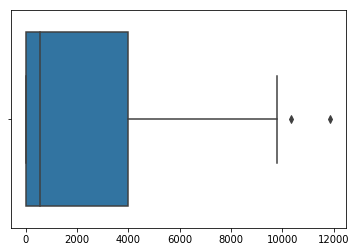

In [15]:
sns.boxplot(petrol_df)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [16]:
corr = petrol_df.corr()
print("the correlation matrix is ")
corr

the correlation matrix is 


,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


In [ ]:
#from the above correlation matrix it is clear that DL has highest correlation with consumption then comes highway

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [17]:
X = petrol_df[[' dl']]
Y = petrol_df[[' consumption']]

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [20]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,  random_state = 100)
from sklearn import linear_model

# Create linear regression object
regressor = linear_model.LinearRegression()
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(x_test.shape)
# Train the model using the training sets
regressor.fit(X_train, Y_train)

(32, 1)
(11, 1)
(32, 1)
(11, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [31]:
coeff = regressor.coef_
intercept = regressor.intercept_
print(coeff,intercept)
X.columns

[[1080.33565344]] [-42.78206719]


Index([' dl'], dtype='object')

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [22]:
Y = coeff * X_train + intercept
y_pred = regressor.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = sqrt(mse)
print(rmse)
regressor.score(X_train,Y_train) #checking score for training data
regressor.score(x_test,y_test) # checking score for test data

6159.31449426033
78.4813002839551


0.16427399177648572

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [23]:
#taking new vairables for mmulti linear regression
new_X = petrol_df[[' income',' highway',' dl']]

In [24]:
New_Y = petrol_df[[' consumption']]

# Question 9: Print the coefficients of the multilinear regression model

In [25]:
new_X_train, new_x_test, new_Y_train, new_y_test = train_test_split(new_X,New_Y,  random_state = 100)
from sklearn import linear_model

# Create linear regression object
new_regressor = linear_model.LinearRegression()

# Train the model using the training sets
new_regressor.fit(new_X_train, new_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
new_coeff = new_regressor.coef_
new_intercept = new_regressor.intercept_
print(new_coeff,new_intercept)

[[-5.03547648e-02  4.02718505e-03  1.18915255e+03]] [80.53871683]


In [27]:
new_regressor.score(new_X_train,new_Y_train) #checking score for training data
new_regressor.score(new_x_test,new_y_test) # checking score for test data

0.5811382874762809

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [30]:
#using ordinary least square method for finding R squared
import statsmodels.api as sm

results  = sm.OLS(endog = new_y_test, exog = new_x_test).fit()
print(results.summary())
one_variable_results  = sm.OLS(endog = y_test, exog = x_test).fit()
print("\n\nvalues for one variable results")
print(one_variable_results.summary())


                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     331.3
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           9.97e-09
Time:                        14:02:31   Log-Likelihood:                -58.262
No. Observations:                  11   AIC:                             122.5
Df Residuals:                       8   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
 income       -0.0964      0.029     -3.354      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
